<a href="https://colab.research.google.com/github/Krishnateja001/cs480student/blob/main/01/CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

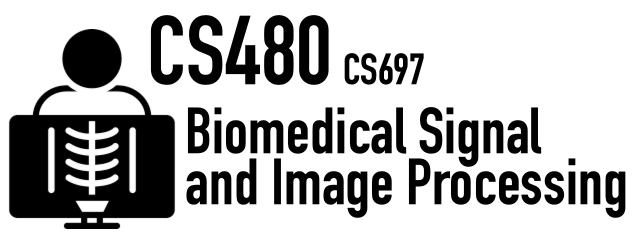
# Assignment 1


In [69]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [70]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [71]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

[-0.215 -0.185 -0.175 -0.17  -0.17  -0.185 -0.17  -0.16  -0.15 ] 3.65 -3.485


(3240.0, 3960.0)

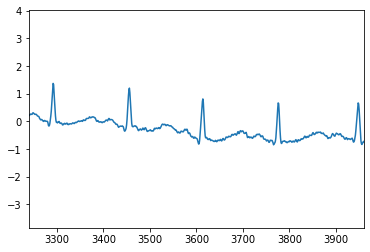

In [72]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
print(ecg[1:10],max(ecg),min(ecg))
plt.plot(ecg)
plt.xlim(9*SAMPLING_RATE,11*SAMPLING_RATE)


**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [73]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [74]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [75]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)


In [76]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


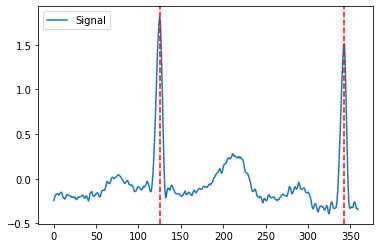

In [77]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

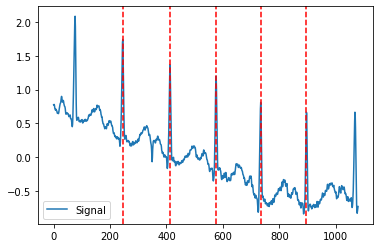

In [78]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?        
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

_, peaks = nk.ecg_peaks(ecg[8*SAMPLING_RATE:11*SAMPLING_RATE], sampling_rate=SAMPLING_RATE)
# print(_,peaks)
# print(peaks['ECG_R_Peaks'])                                                       
plot = nk.events_plot(peaks['ECG_R_Peaks'], ecg[8*SAMPLING_RATE:11*SAMPLING_RATE])

**Task 3:** Detect Heartrate. [15 Points]

In [79]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that

In [80]:
#from above graph i am getting 5 rpeaks for 3 seconds
#i calculated how much for 60 seconds 
#i.e, 100 rpeaks per min 
#100 beats is fast heart rate
#collaborated with shreyansh
no_of_peaks = 5
no_of_sec = 3
beats_per_min = (no_of_peaks * 60)/no_of_sec
print("beats_per_min:",beats_per_min)

beats_per_min: 100.0


**Task 4:** Detect P Q S T Peaks. [25 Points]

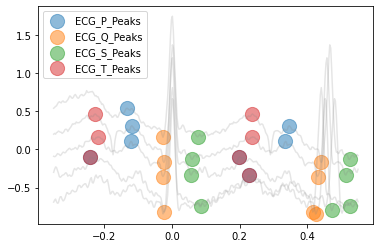

In [81]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://  .readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Delineate the ECG signal
_, pqstwaves= nk.ecg_delineate(ecg[8*SAMPLING_RATE:11*SAMPLING_RATE], peaks, sampling_rate=360, method="peak", show=True, show_type='peaks')


# plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
#                        waves_peak['ECG_P_Peaks'][:5],
#                        waves_peak['ECG_Q_Peaks'][:5],
#                        waves_peak['ECG_S_Peaks'][:5]], ecg[8*SAMPLING_RATE:11*SAMPLING_RATE])

In [82]:
# TODO Does the detection work well?
# YES it does but there is lot of noise

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

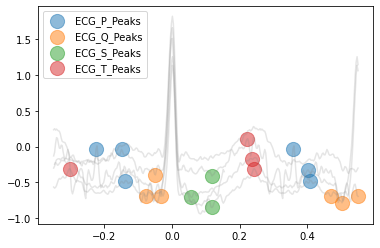

In [83]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.\
_, pqstwaves = nk.ecg_delineate(ecg[0:1000], rpeaks['ECG_R_Peaks'][0:5], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

[125 343 552 748 944] -1.7774723082566934 2.3808837792617807


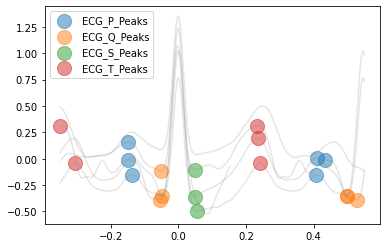

In [91]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
filtered_data = nk.signal_filter(ecg, lowcut=0.5, highcut=45)
print(rpeaks['ECG_R_Peaks'][0:5],min(filtered_data),max(filtered_data))
_, pqstwaves = nk.ecg_delineate(filtered_data[0:1000], rpeaks['ECG_R_Peaks'][0:5], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [85]:
# TODO Does the filtering improve the result?
#YES

In [86]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#